# Exploratory Data Analysis

## Dataset overview

In [1]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Cargamos dataset a utilizar
df_entrada = pd.read_csv("../data/ds_gasto_5.csv", sep=";")

In [3]:
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ANIO                              627803 non-null  int64  
 1   NIVEL                             627803 non-null  int64  
 2   NIVEL_GOBIERNO                    627803 non-null  object 
 3   DPTO                              627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     627803 non-null  object 
 5   FUNCION                           627803 non-null  int64  
 6   FUNCION_NOMBRE                    627803 non-null  object 
 7   PIA                               627803 non-null  int64  
 8   PIM                               627803 non-null  int64  
 9   DEVENGADO                         627803 non-null  float64
 10  IP                                627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          627803 non-null  i

    intervalo  frecuencia
0   0.00-0.05      128322
1   0.05-0.10        8771
2   0.10-0.15        6184
3   0.15-0.20        5558
4   0.20-0.25        5771
5   0.25-0.30        7080
6   0.30-0.35        6066
7   0.35-0.40        6436
8   0.40-0.45        7329
9   0.45-0.50        7830
10  0.50-0.55       10342
11  0.55-0.60        9729
12  0.60-0.65        9709
13  0.65-0.70       12139
14  0.70-0.75       12844
15  0.75-0.80       15432
16  0.80-0.85       20658
17  0.85-0.90       26931
18  0.90-0.95       41344
19  0.95-1.00      279328


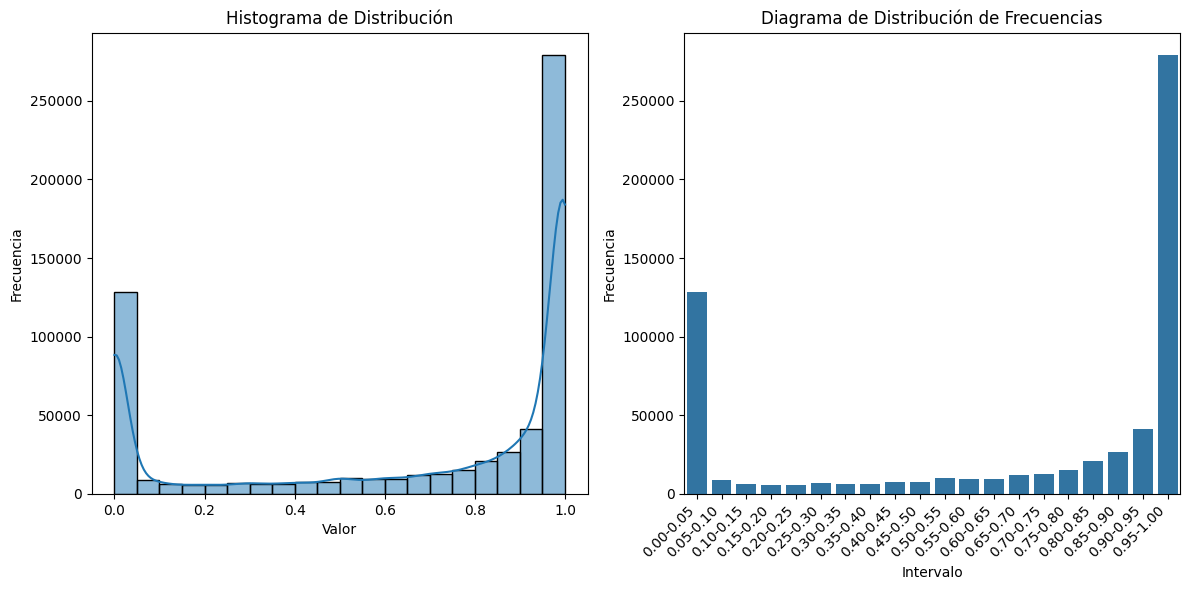

In [4]:

# Calcular la distribución de frecuencias
num_bins = 20  # Puedes ajustar este número según necesites
hist, bin_edges = np.histogram(df_entrada['AVANCE'], bins=num_bins, range=(0, 1))

# Crear un DataFrame con los resultados para facilitar la visualización
hist_df = pd.DataFrame({
    'intervalo': [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)],
    'frecuencia': hist
})

# Imprimir la tabla de frecuencias
print(hist_df)

# Visualización
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data=df_entrada, x='AVANCE', bins=num_bins, kde=True)
plt.title('Histograma de Distribución')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Gráfico de barras de frecuencia
plt.subplot(1, 2, 2)
sns.barplot(data=hist_df, x='intervalo', y='frecuencia')
plt.title('Diagrama de Distribución de Frecuencias')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

   ANIO  NIVEL NIVEL_GOBIERNO  DPTO DEPARTAMENTO_EJECUTORA_NOMBRE  FUNCION  \
0  2017      2              R     1                      AMAZONAS       15   
1  2023      2              R     1                      AMAZONAS       15   
2  2016      2              R     1                      AMAZONAS       15   
3  2020      2              R     1                      AMAZONAS       15   
4  2019      2              R     1                      AMAZONAS       15   

  FUNCION_NOMBRE  PIA     PIM  DEVENGADO  ...  NRO_EJECUTORAS_X_PROYECTO  \
0     TRANSPORTE    0   79983   79982.76  ...                          1   
1     TRANSPORTE    0   57539   57537.81  ...                          1   
2     TRANSPORTE    0  160000  159965.52  ...                          1   
3     TRANSPORTE    0   41528   40326.67  ...                          1   
4     TRANSPORTE    0  914962  642811.24  ...                          1   

   NPRY_PUNTAJEIRI  PUNTAJE_INCO_EJECUTORA  MONTO_VIABLE  COSTO_ACTUALIZAD

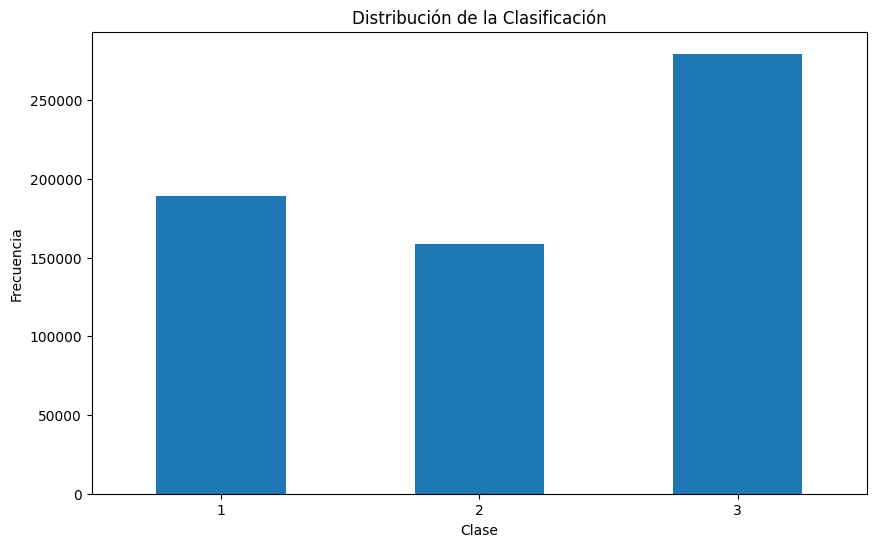

In [5]:
# Crear la nueva columna 'clasificacion' usando np.select
condiciones = [
    (df_entrada['AVANCE'] >= 0.95),
    (df_entrada['AVANCE'] >= 0.5) & (df_entrada['AVANCE'] < 0.95),
    (df_entrada['AVANCE'] < 0.5)
]

valores = [3, 2, 1]

df_entrada['clasificacion'] = np.select(condiciones, valores, default=0)

# Mostrar las primeras filas del DataFrame para verificar
print(df_entrada.head())

# Mostrar un resumen de la nueva columna
print(df_entrada['clasificacion'].value_counts().sort_index())

# Opcional: Visualizar la distribución de la nueva clasificación
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_entrada['clasificacion'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de la Clasificación')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [6]:
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ANIO                              627803 non-null  int64  
 1   NIVEL                             627803 non-null  int64  
 2   NIVEL_GOBIERNO                    627803 non-null  object 
 3   DPTO                              627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     627803 non-null  object 
 5   FUNCION                           627803 non-null  int64  
 6   FUNCION_NOMBRE                    627803 non-null  object 
 7   PIA                               627803 non-null  int64  
 8   PIM                               627803 non-null  int64  
 9   DEVENGADO                         627803 non-null  float64
 10  IP                                627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          627803 non-null  i

In [25]:
#df_entrada.drop(df_entrada.columns[0], axis=1, inplace=True)


In [7]:
df_entrada.isnull().sum()

ANIO                                     0
NIVEL                                    0
NIVEL_GOBIERNO                           0
DPTO                                     0
DEPARTAMENTO_EJECUTORA_NOMBRE            0
FUNCION                                  0
FUNCION_NOMBRE                           0
PIA                                      0
PIM                                      0
DEVENGADO                                0
IP                                       0
CAMBIO_GOBIERNO_NACIONAL                 0
NRO_PRESIDENTES_X_ANO                    0
FENOMENO_NINO                            0
PANDEMIA                                 0
CAMBIO_GOBIERNO_REGIONAL_LOCAL           0
ELECCION_REGIONAL_LOCAL                  0
TIPO_GOBIERNO_NACIONAL                   0
NRO_CONFLICTO_SOCIAL_X_ANO               0
INFLACION_ANUAL                          0
PROYECTO                                 0
EJECUTORA                                0
PROYECTO_EDAD_NETA                       0
PROYECTO_ED

In [8]:
df_entrada_cleaned = df_entrada.dropna(subset=['MONTO_VIABLE'])

In [9]:
df_entrada_cleaned.isnull().sum()

ANIO                                0
NIVEL                               0
NIVEL_GOBIERNO                      0
DPTO                                0
DEPARTAMENTO_EJECUTORA_NOMBRE       0
FUNCION                             0
FUNCION_NOMBRE                      0
PIA                                 0
PIM                                 0
DEVENGADO                           0
IP                                  0
CAMBIO_GOBIERNO_NACIONAL            0
NRO_PRESIDENTES_X_ANO               0
FENOMENO_NINO                       0
PANDEMIA                            0
CAMBIO_GOBIERNO_REGIONAL_LOCAL      0
ELECCION_REGIONAL_LOCAL             0
TIPO_GOBIERNO_NACIONAL              0
NRO_CONFLICTO_SOCIAL_X_ANO          0
INFLACION_ANUAL                     0
PROYECTO                            0
EJECUTORA                           0
PROYECTO_EDAD_NETA                  0
PROYECTO_EDAD_BRUTA                 0
IGEIP_EJECUCION                     0
P_INCO_AVG                          0
NEJE_PUNTAJE

In [7]:
df_entrada.head()

,ANIO,NIVEL,NIVEL_GOBIERNO,DPTO,DEPARTAMENTO_EJECUTORA_NOMBRE,FUNCION,FUNCION_NOMBRE,PIA,PIM,DEVENGADO,...,EJECUTORA,PROYECTO_EDAD_NETA,PROYECTO_EDAD_BRUTA,IGEIP_EJECUCION,P_INCO_AVG,NEJE_PUNTAJEIRI,NRO_EJECUTORAS_X_PROYECTO,AVANCE,CLASE,clasificacion
0,2017,2,R,1,AMAZONAS,15,TRANSPORTE,0,79983,79982.76,...,721,6,8,0.629,51.47,36.305761,1,1.0000,1,3
1,2023,2,R,1,AMAZONAS,15,TRANSPORTE,0,57539,57537.81,...,721,6,8,0.629,51.47,36.305761,1,1.0000,1,3
2,2016,2,R,1,AMAZONAS,15,TRANSPORTE,0,160000,159965.52,...,721,6,8,0.629,51.47,36.305761,1,0.9998,1,3
3,2020,2,R,1,AMAZONAS,15,TRANSPORTE,0,41528,40326.67,...,721,6,8,0.629,51.47,36.305761,1,0.9711,1,3
4,2019,2,R,1,AMAZONAS,15,TRANSPORTE,0,914962,642811.24,...,721,6,8,0.629,51.47,36.305761,1,0.7026,0,2


## Analisis de variables Categoricas y Numericas

In [8]:
(
    df_entrada
    .astype({
        'ANIO': 'category',
        'NIVEL': 'category',
        'NIVEL_GOBIERNO': 'category',
        'DEPARTAMENTO_EJECUTORA_NOMBRE': 'category',
        'FUNCION_NOMBRE': 'category',
        'TIPO_GOBIERNO_NACIONAL': 'category',
        'EJECUTORA': 'category',
    })
).describe(include='category')

,ANIO,NIVEL,NIVEL_GOBIERNO,DEPARTAMENTO_EJECUTORA_NOMBRE,FUNCION_NOMBRE,TIPO_GOBIERNO_NACIONAL,EJECUTORA
count,627803,627803,627803,627803,627803,627803,627803
unique,12,3,3,25,25,3,2536
top,2022,3,M,LIMA,TRANSPORTE,Centro derecha,1443
freq,62904,507958,507958,97085,135721,257739,7945


<Axes: title={'center': 'Distribución de registros por año'}, xlabel='Año', ylabel='Cantidad de registros'>

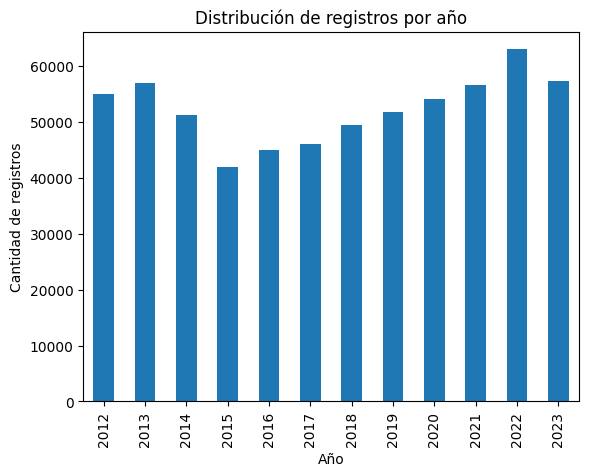

In [9]:
(
    df_entrada
    .ANIO
    .value_counts()
    .sort_index() # Ordena los valores por el índice (anio)
    .plot(
        kind='bar',
        title='Distribución de registros por año',
        xlabel='Año',
        ylabel='Cantidad de registros'
    )
)

### Distribucion

In [15]:
columnas_categoricas = ['ANIO','NIVEL_GOBIERNO', 'DEPARTAMENTO_EJECUTORA_NOMBRE', 'FUNCION_NOMBRE', 'TIPO_GOBIERNO_NACIONAL', 'CAMBIO_GOBIERNO_REGIONAL_LOCAL', 'ELECCION_REGIONAL_LOCAL']

C:\Users\jean_\AppData\Local\Temp\ipykernel_18248\2191008307.py:5: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


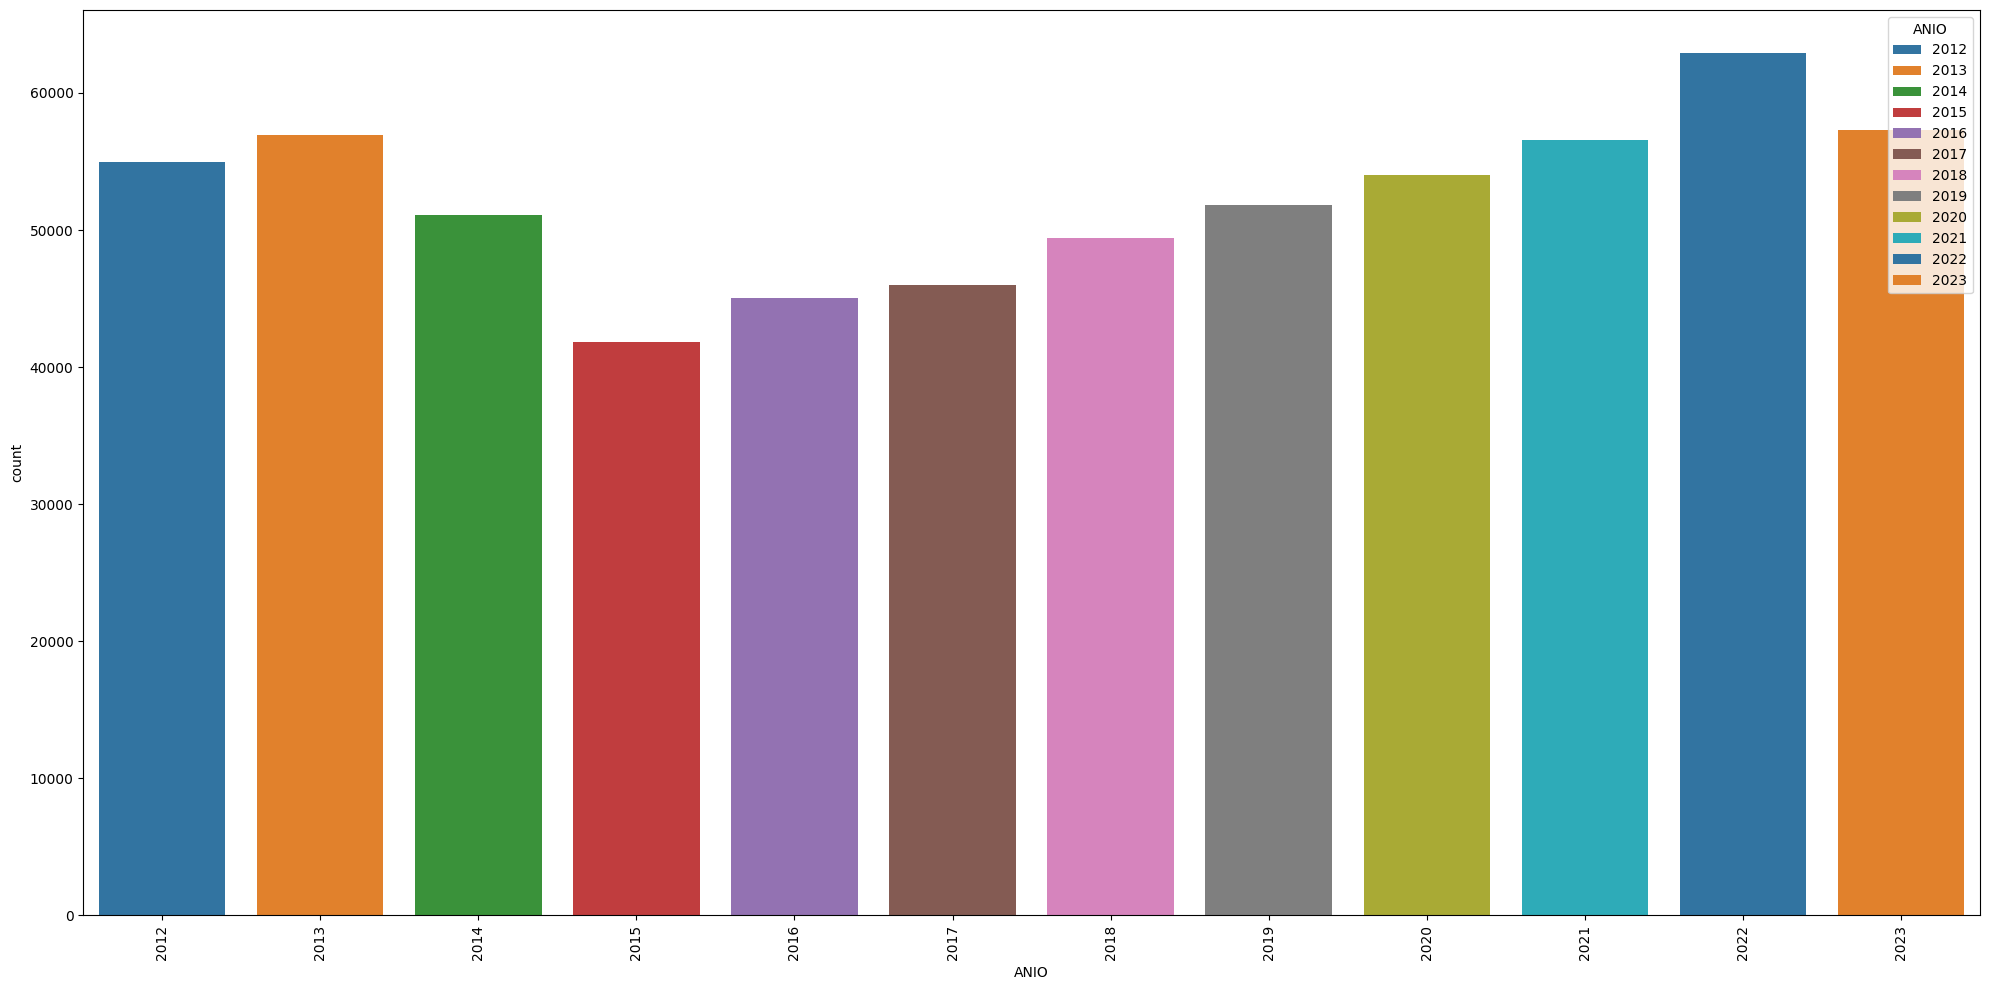

C:\Users\jean_\AppData\Local\Temp\ipykernel_18248\2191008307.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(


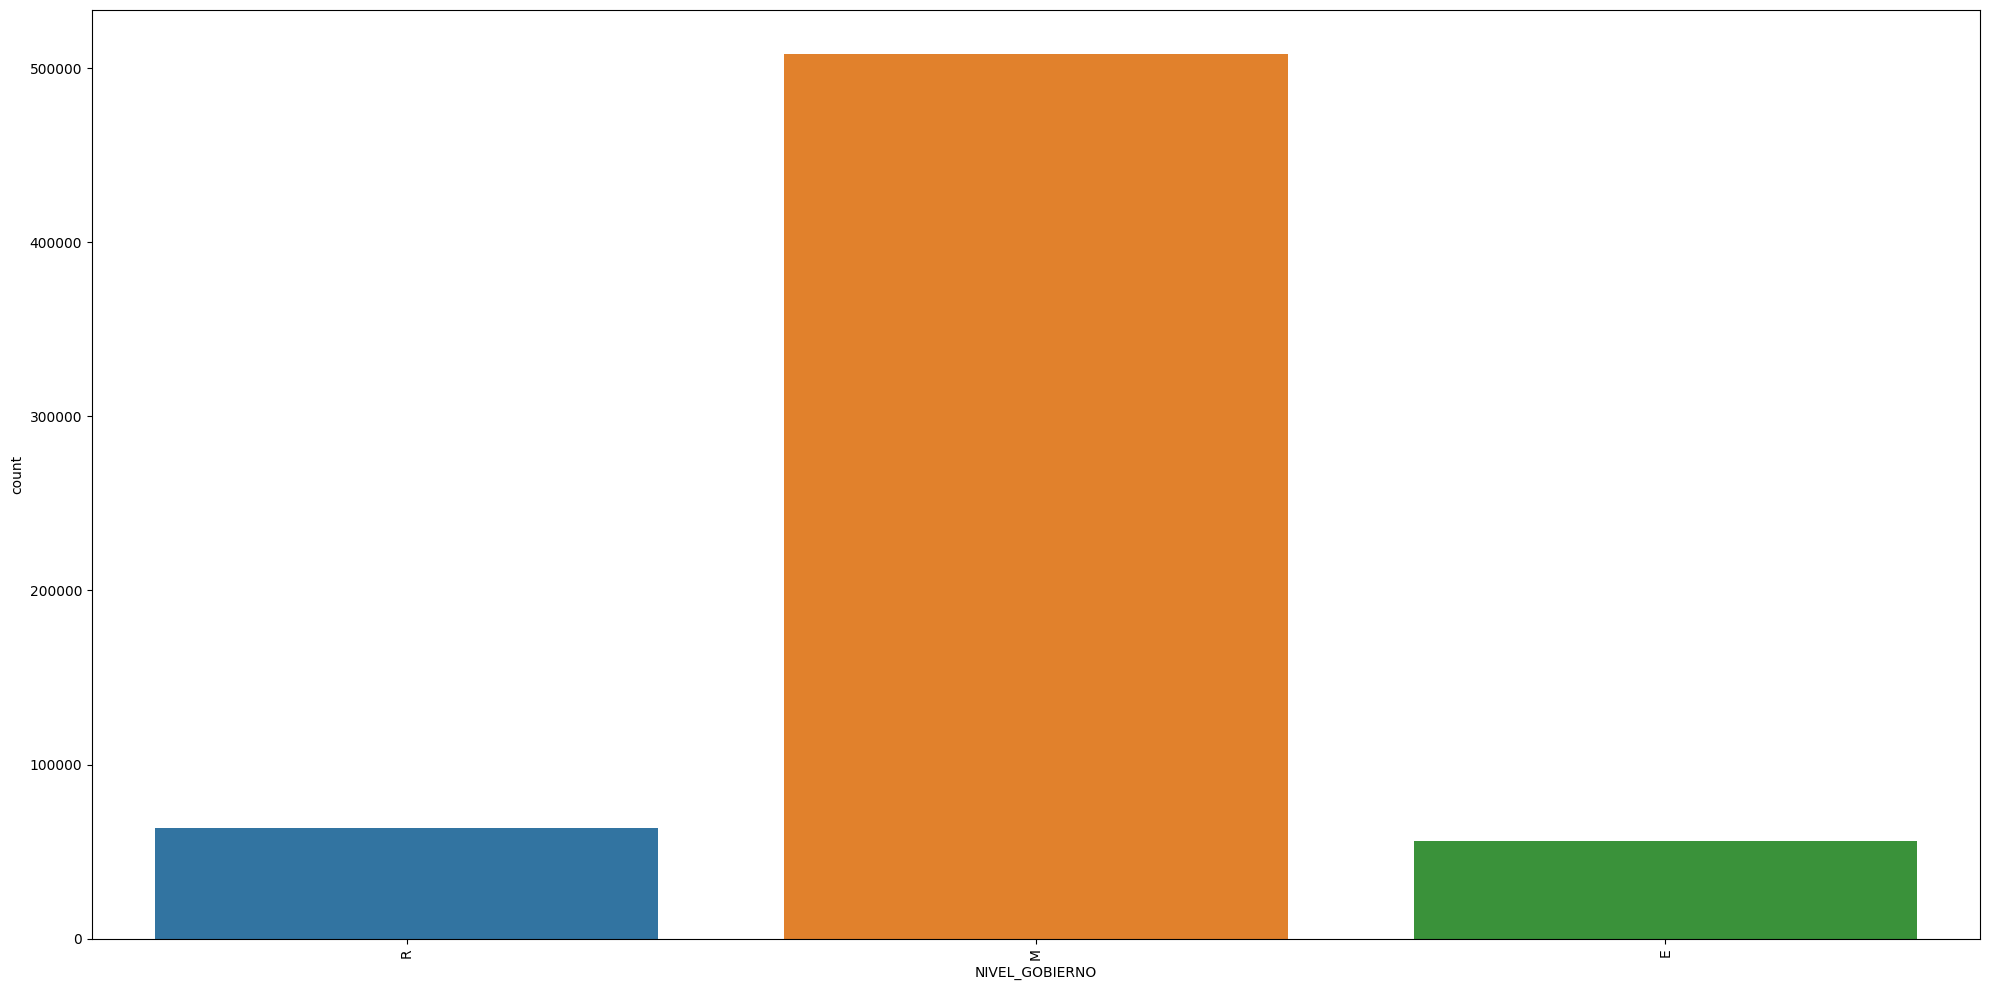

C:\Users\jean_\AppData\Local\Temp\ipykernel_18248\2191008307.py:5: UserWarning: 
The palette list has fewer values (10) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


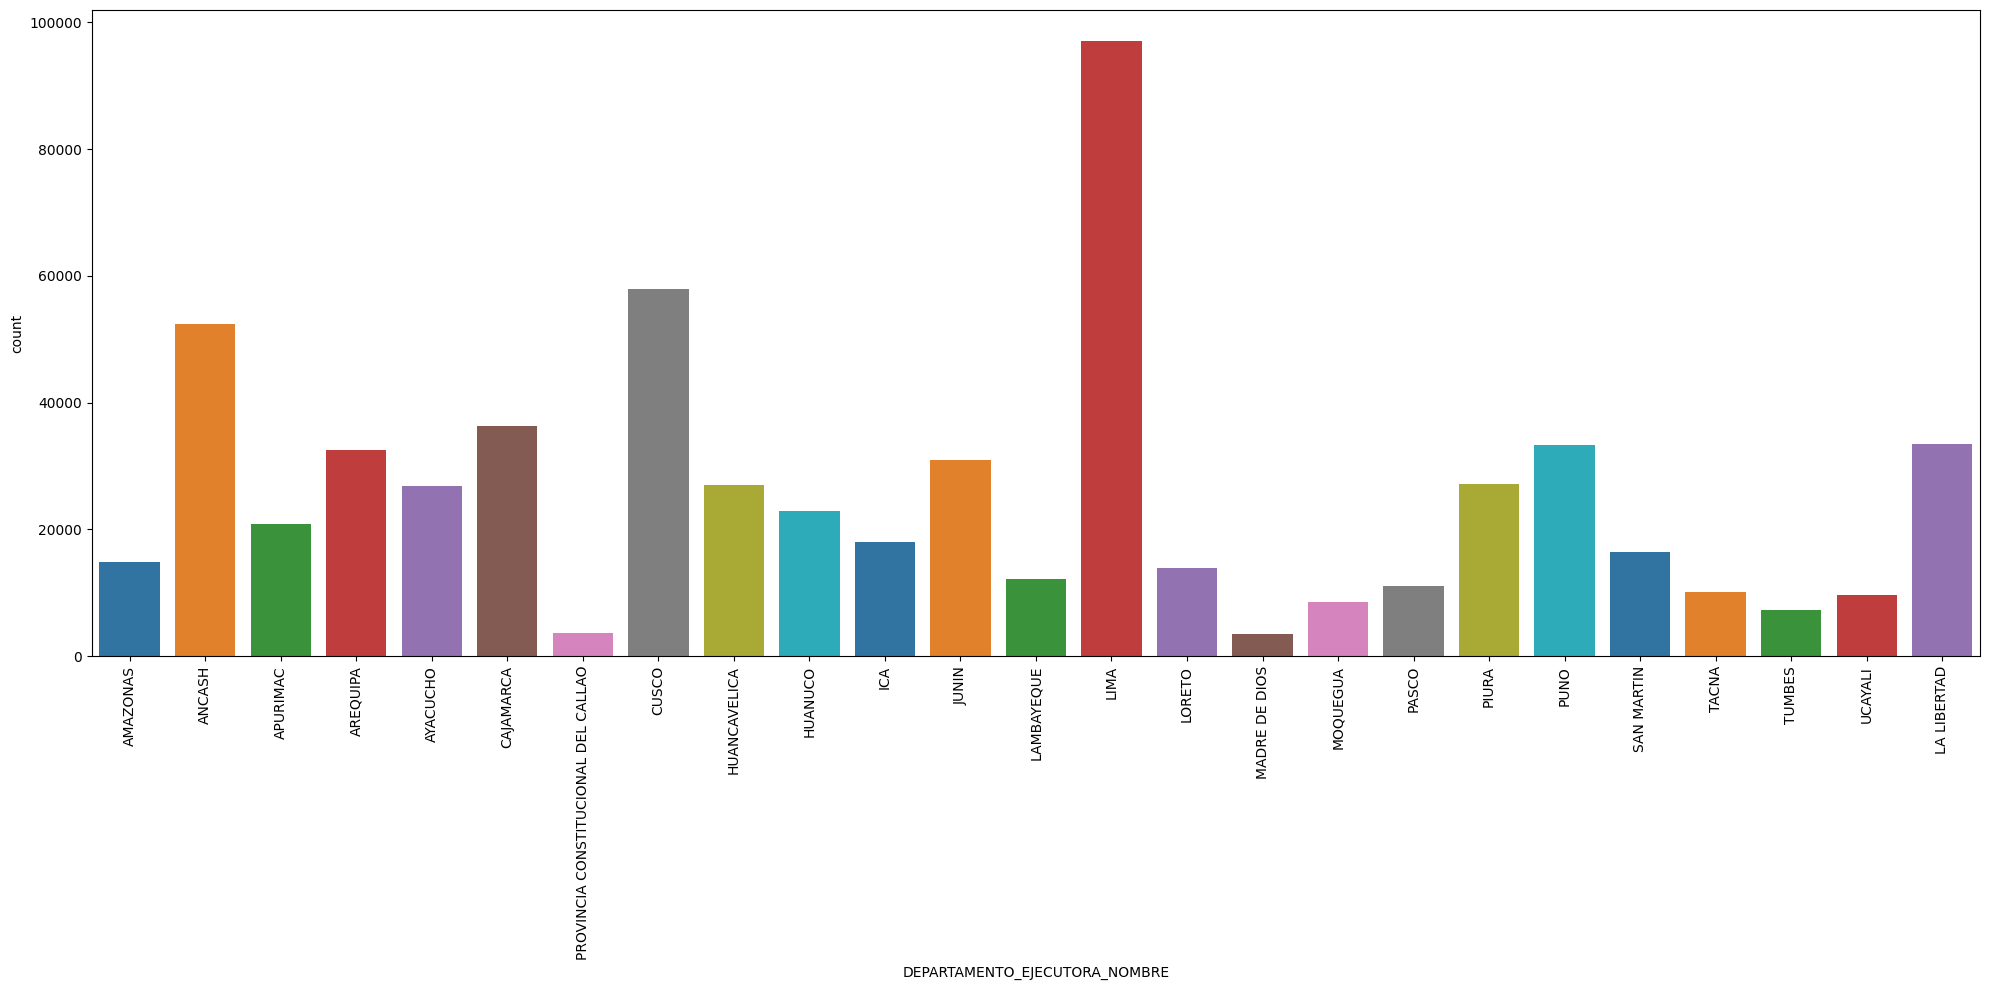

C:\Users\jean_\AppData\Local\Temp\ipykernel_18248\2191008307.py:5: UserWarning: 
The palette list has fewer values (10) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


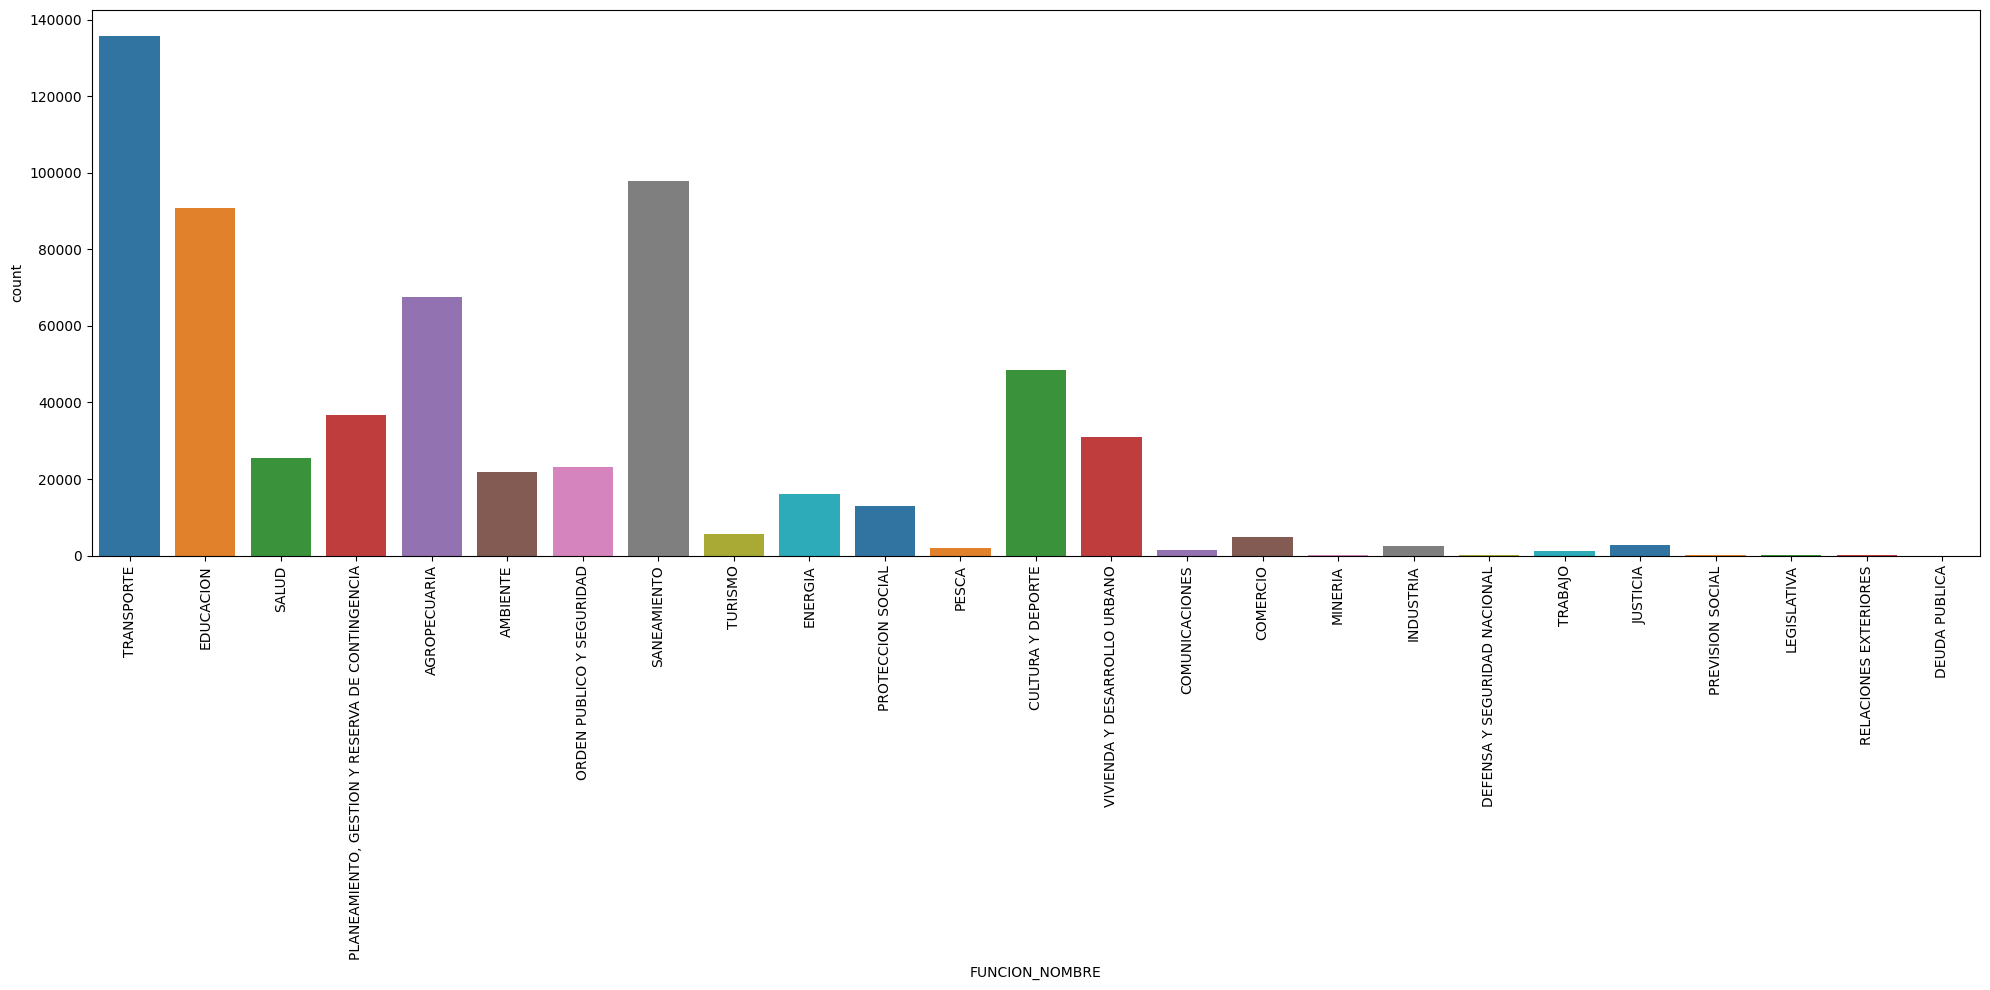

C:\Users\jean_\AppData\Local\Temp\ipykernel_18248\2191008307.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(


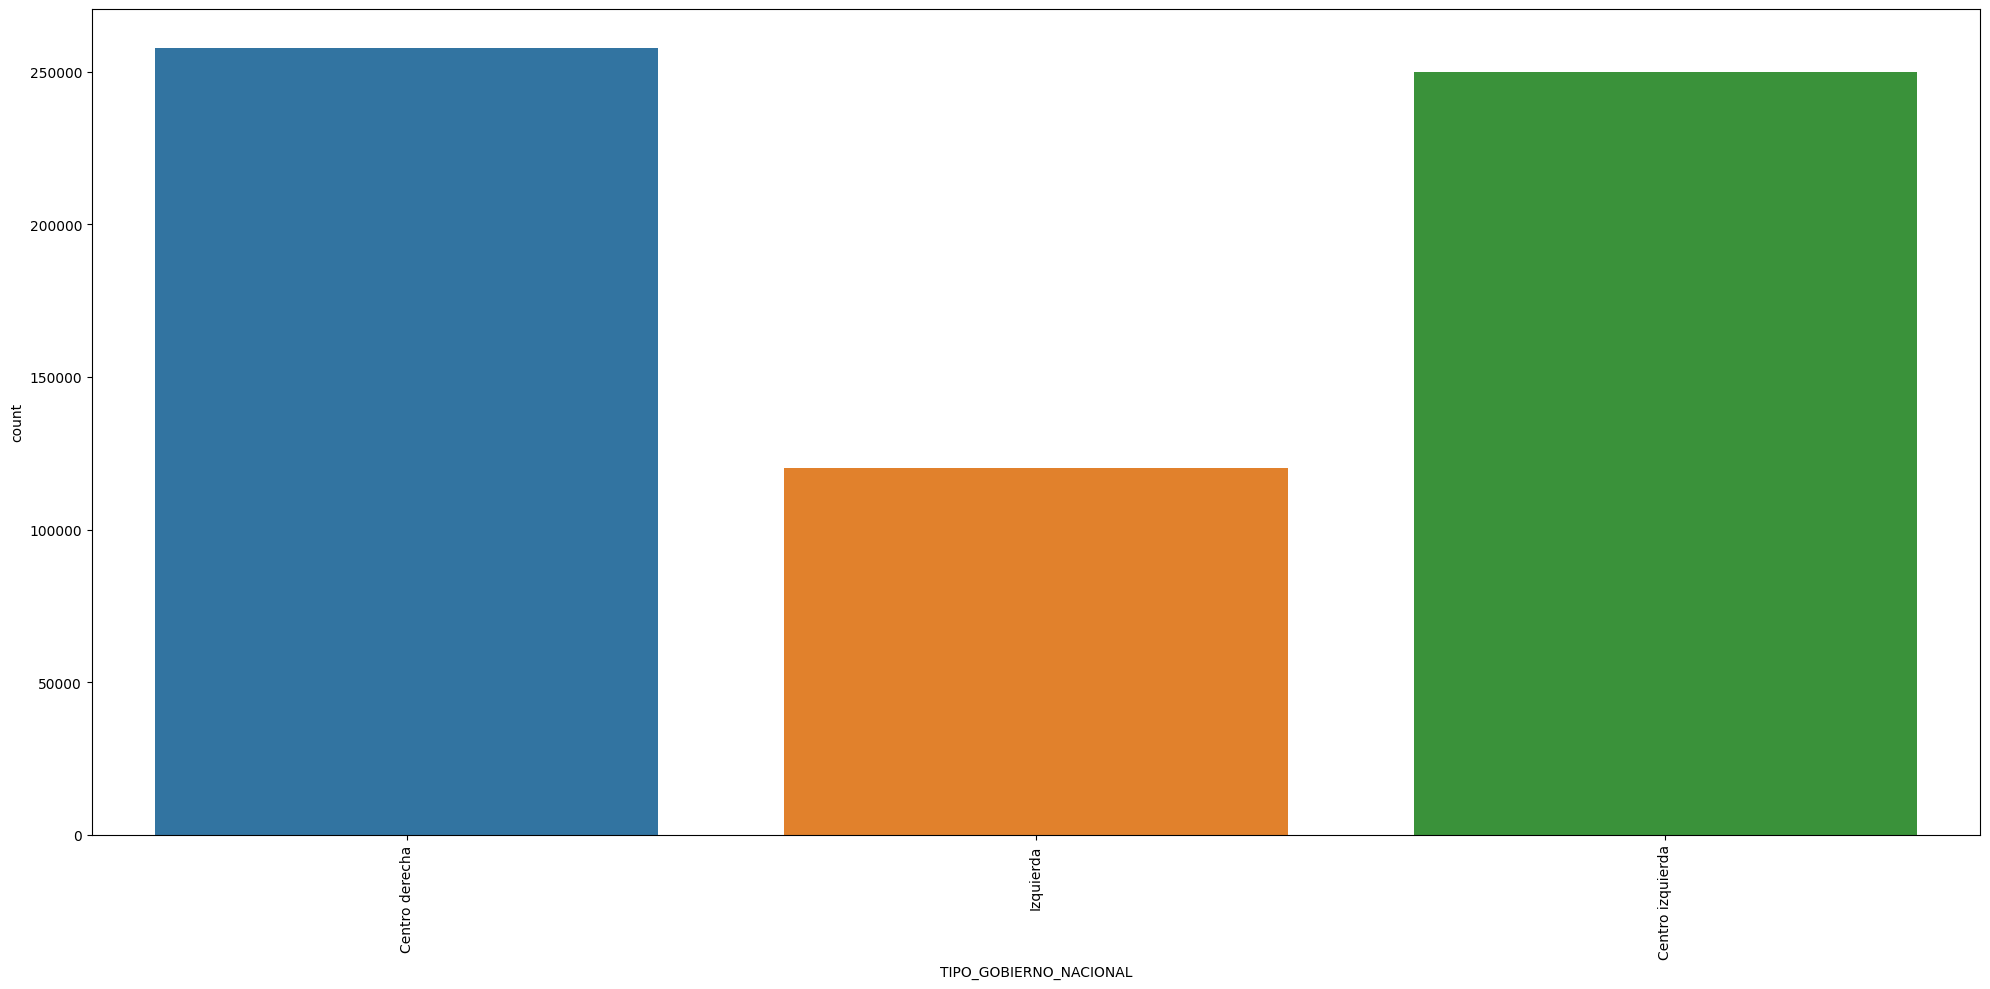

C:\Users\jean_\AppData\Local\Temp\ipykernel_18248\2191008307.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(


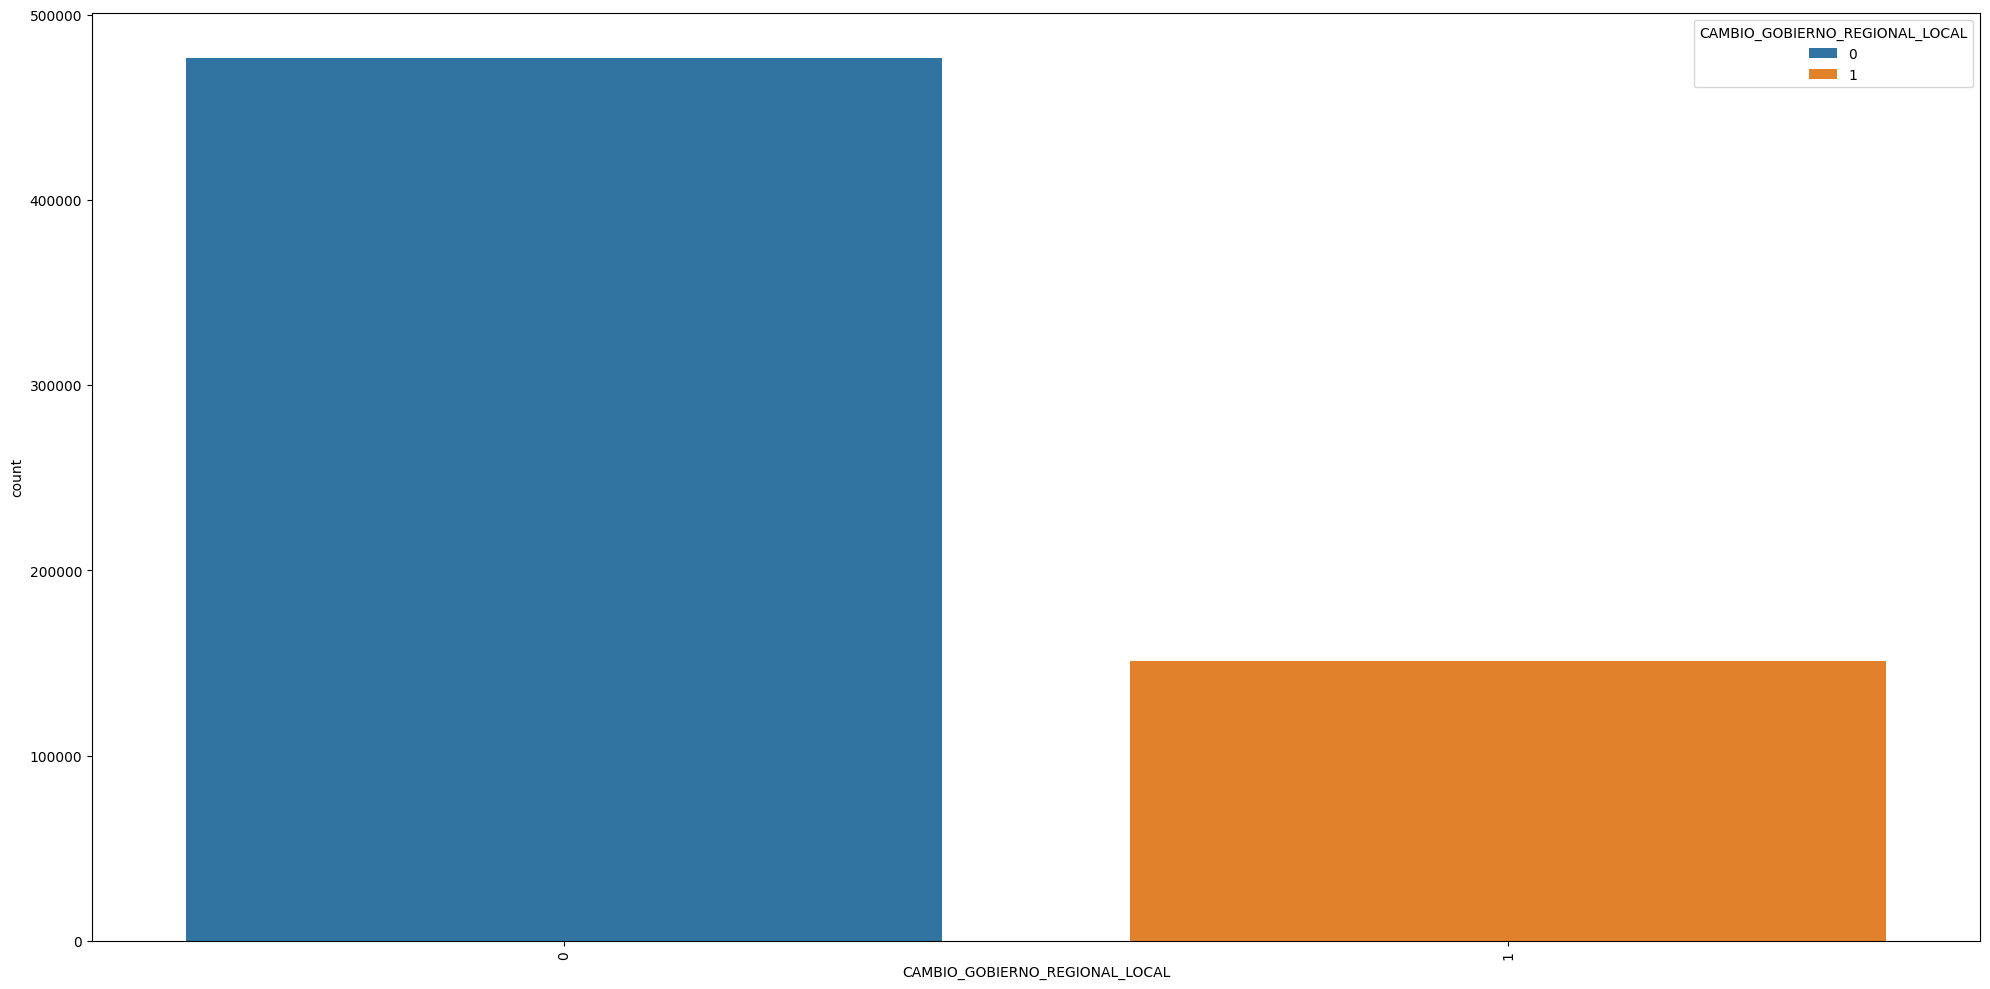

C:\Users\jean_\AppData\Local\Temp\ipykernel_18248\2191008307.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(


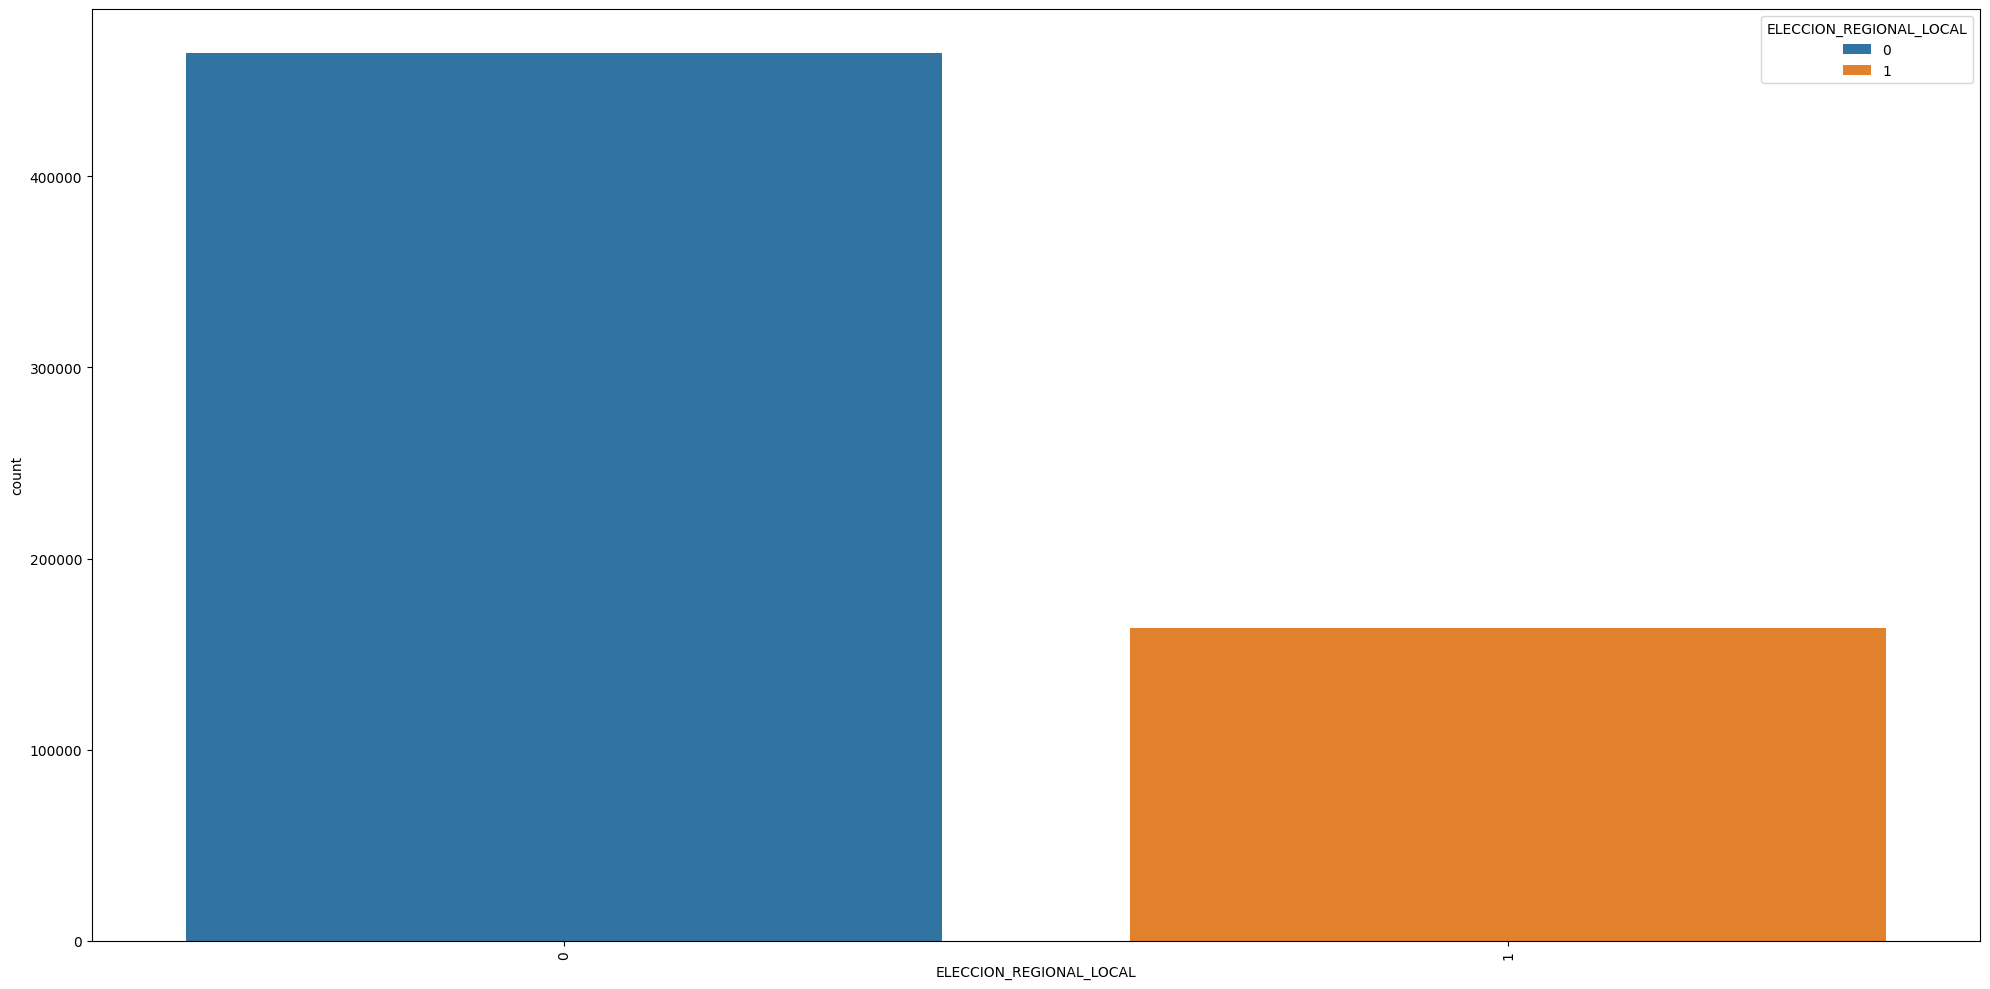

In [16]:
colores_personalizados = ['green', 'blue', 'orange']
for col in columnas_categoricas:
    fig, ax = plt.subplots(figsize=(20, 10))  # Aumentamos el ancho para estirar horizontalmente
    
    sns.countplot(
        data=df_entrada,
        x=col,
        hue=col,
        palette=sns.color_palette("tab10"),
        ax=ax
    )
    
    # Rotamos las etiquetas del eje x verticalmente
    plt.xticks(rotation=90, ha='center')
    
    # Ajustamos el diseño para que las etiquetas no se corten
    plt.tight_layout()
    
    # Mostramos el gráfico
    plt.show()

### Distribucion con la variable objetivo


In [21]:
def plot_categorical(column):
    #fig = plt.figure(figsize=(10, 5))    
    #sns.countplot(data=df_entrada, x=column, hue='CLASE')
    #plt.show()
    fig, ax = plt.subplots(figsize=(9, 6))  # Aumentamos el ancho para estirar horizontalmente

    sns.countplot(
        data=df_entrada,
        x=column,
        hue='clasificacion',
        #palette=sns.color_palette("tab10"),
        ax=ax
    )
    
    # Rotamos las etiquetas del eje x verticalmente
    plt.xticks(rotation=90, ha='center')
    
    # Ajustamos el diseño para que las etiquetas no se corten
    #plt.tight_layout()
    
    # Mostramos el gráfico
    plt.show()

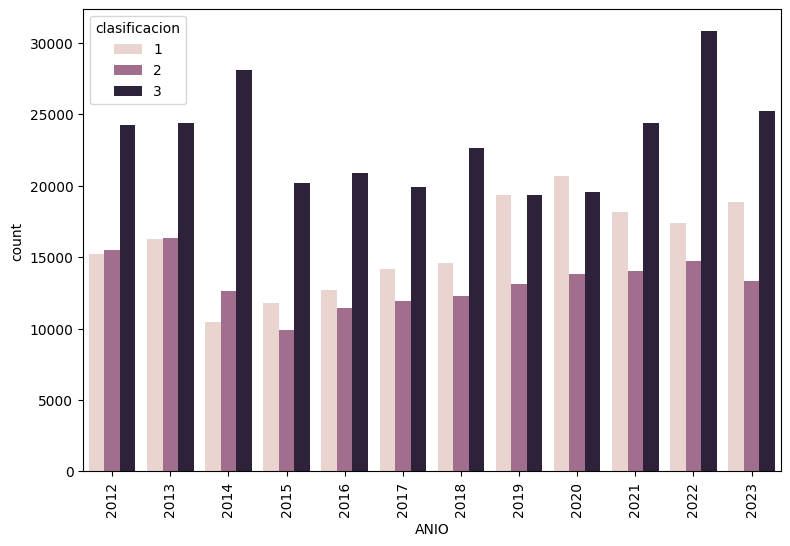

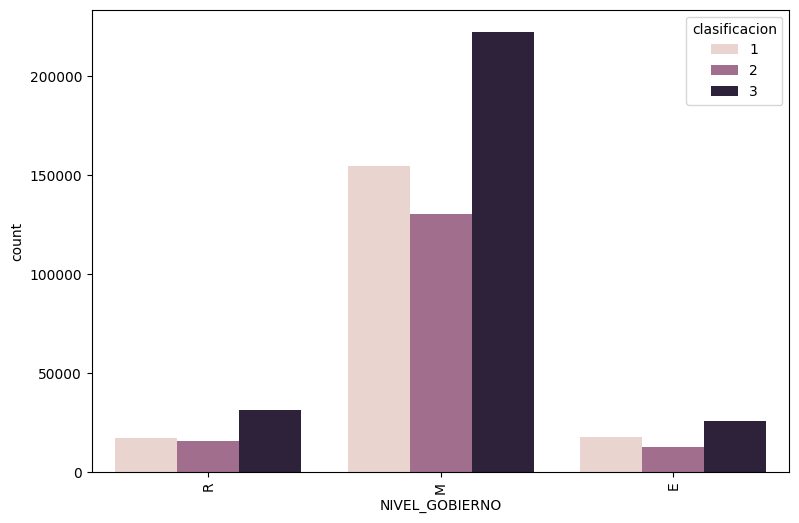

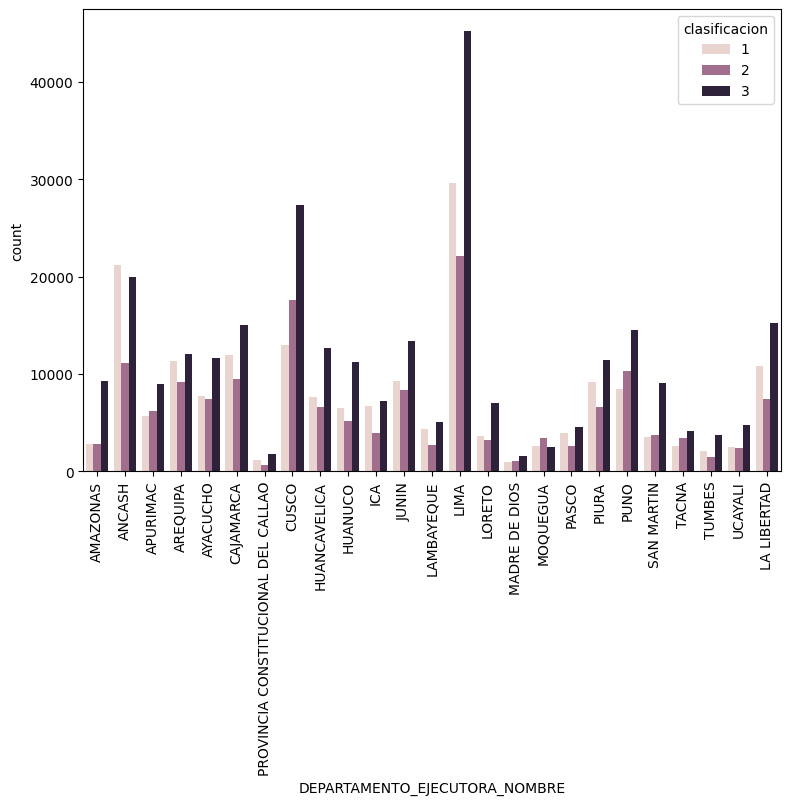

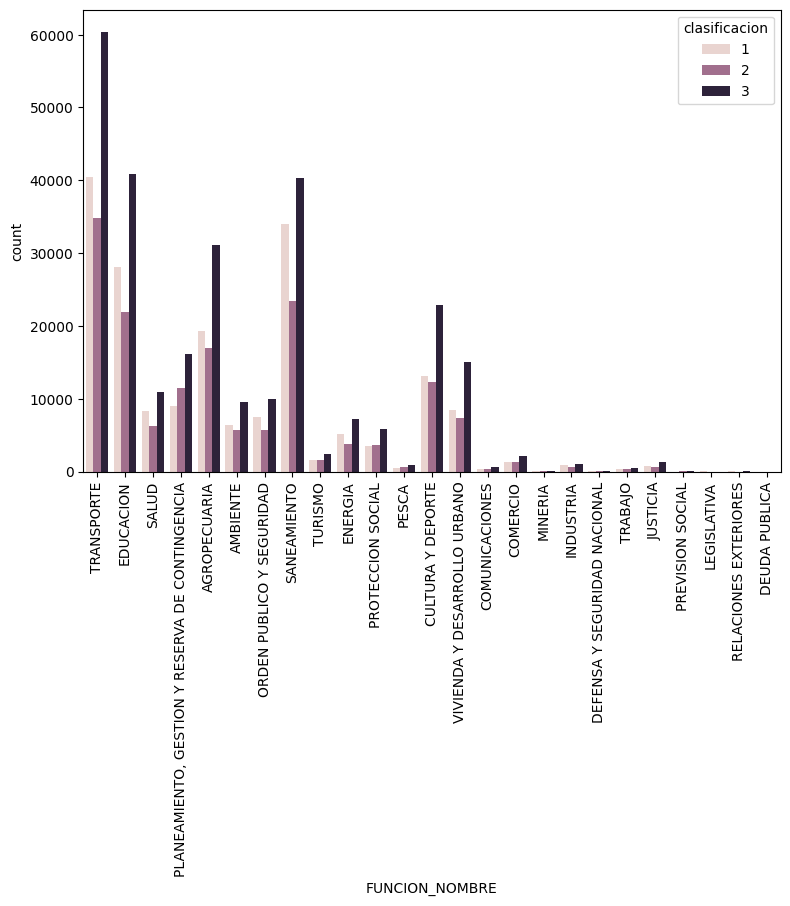

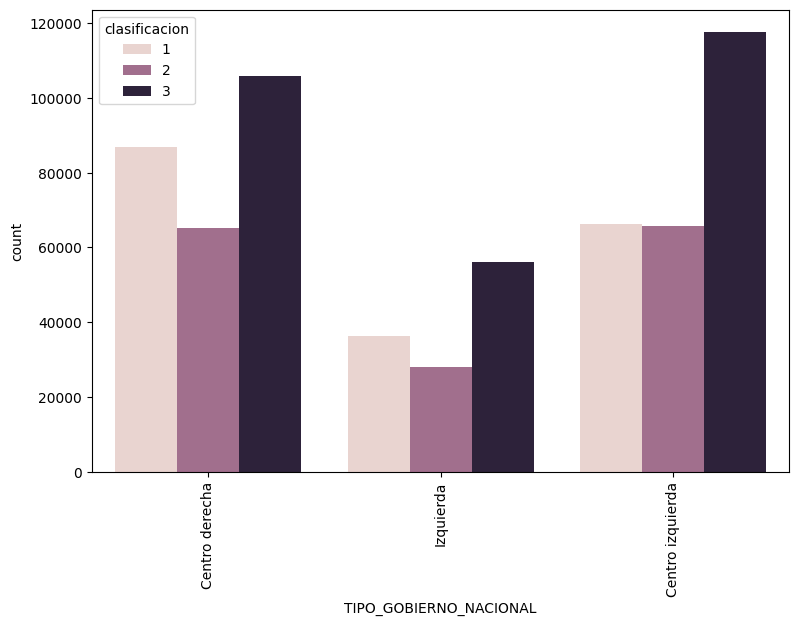

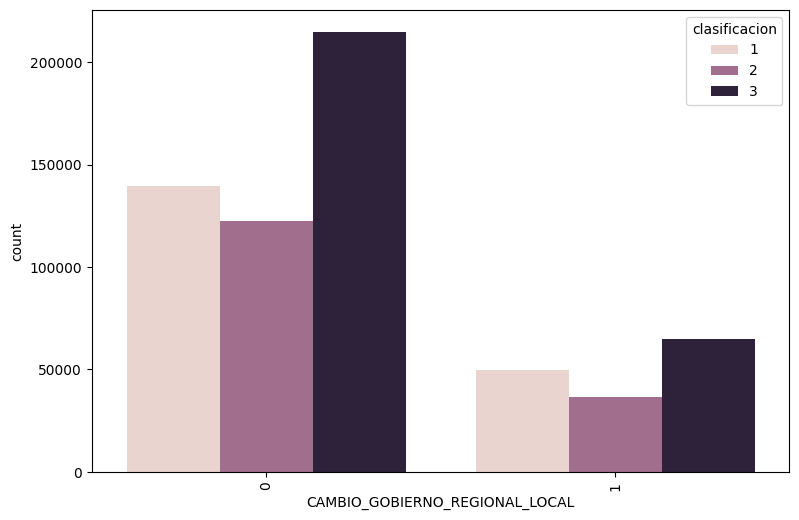

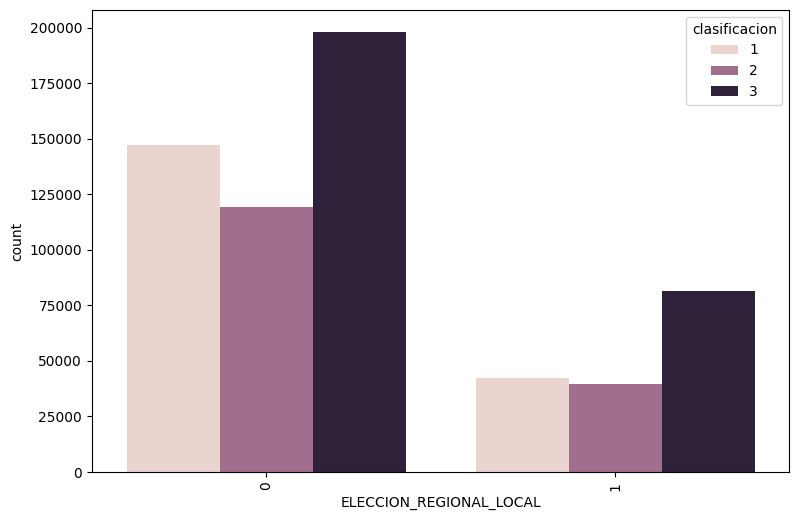

In [22]:
for col in columnas_categoricas:
    plot_categorical(col)

In [14]:
num_var = ['PIA'
        ,'PIM'
        ,'DEVENGADO'
        ,'IP'
        ,'NRO_PRESIDENTES_X_ANO'
        ,'NRO_CONFLICTO_SOCIAL_X_ANO'
        ,'INFLACION_ANUAL'
        ,'PROYECTO_EDAD_NETA'
        ,'PROYECTO_EDAD_BRUTA'
        ,'AVANCE'
        ,'CLASE']
cat_var = ['ANIO'
,'NIVEL'
,'NIVEL_GOBIERNO'
,'DPTO'
,'DEPARTAMENTO_EJECUTORA_NOMBRE'
,'FUNCION'
,'FUNCION_NOMBRE'
,'CAMBIO_GOBIERNO_NACIONAL'
,'FENOMENO_NINO'
,'PANDEMIA'
,'CAMBIO_GOBIERNO_REGIONAL_LOCAL'
,'ELECCION_REGIONAL_LOCAL'
,'TIPO_GOBIERNO_NACIONAL'
,'PROYECTO'
,'EJECUTORA'
,'CLASE']
df_entrada_num = df_entrada[num_var]
df_entrada_cat = df_entrada[cat_var]

### Agregando Ruido

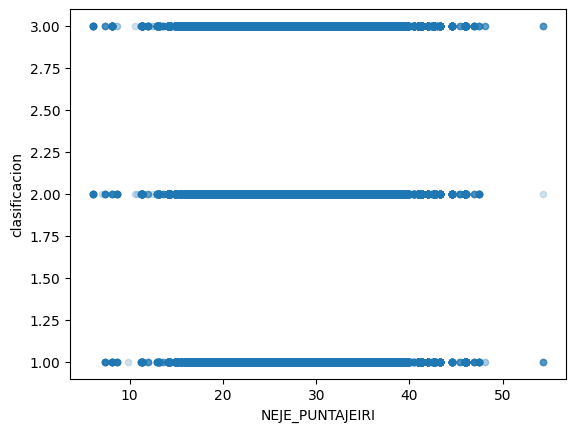

In [14]:
#df_entrada=df_entrada.query('ANIO > 2021')
df_entrada.plot.scatter(x="NEJE_PUNTAJEIRI", y="clasificacion", alpha=0.2)
plt.show()

# Classification Model : Logistic Regression

In [23]:
df_entrada = df_entrada.query('DEVENGADO >= 0')
df_entrada = df_entrada.query('PIM >= DEVENGADO')
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627803 entries, 0 to 627802
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ANIO                              627803 non-null  int64  
 1   NIVEL                             627803 non-null  int64  
 2   NIVEL_GOBIERNO                    627803 non-null  object 
 3   DPTO                              627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     627803 non-null  object 
 5   FUNCION                           627803 non-null  int64  
 6   FUNCION_NOMBRE                    627803 non-null  object 
 7   PIA                               627803 non-null  int64  
 8   PIM                               627803 non-null  int64  
 9   DEVENGADO                         627803 non-null  float64
 10  IP                                627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          627803 non-null  int64 

### Drop

In [33]:
col_to_drop = [ 'ANIO'
            ,'NIVEL_GOBIERNO'
            ,'DEPARTAMENTO_EJECUTORA_NOMBRE'
            ,'FUNCION_NOMBRE'
            ,'PIA'
            ,'DEVENGADO'
            ,'PROYECTO'
            ,'EJECUTORA'
            ,'AVANCE' 
            ,'CLASE'
            ,'FENOMENO_NINO' # IG muy bajo
            ,'CAMBIO_GOBIERNO_NACIONAL' # IG muy bajo
            ,'P_INCO_AVG' # Incluido en PUNTAJE_INCO_EJECUTORA
            ,'NEJE_PUNTAJEIRI' # Incluido en NPRY_PUNTAJEIRI
            ]
               
df_entrada_drop = df_entrada_cleaned.drop(col_to_drop, axis='columns', inplace=False)

In [25]:
df_entrada.info()
df_entrada.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 627803 entries, 0 to 627802
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ANIO                              627803 non-null  int64  
 1   NIVEL                             627803 non-null  int64  
 2   NIVEL_GOBIERNO                    627803 non-null  object 
 3   DPTO                              627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     627803 non-null  object 
 5   FUNCION                           627803 non-null  int64  
 6   FUNCION_NOMBRE                    627803 non-null  object 
 7   PIA                               627803 non-null  int64  
 8   PIM                               627803 non-null  int64  
 9   DEVENGADO                         627803 non-null  float64
 10  IP                                627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          627803 non-null  int64 

,ANIO,NIVEL,NIVEL_GOBIERNO,DPTO,DEPARTAMENTO_EJECUTORA_NOMBRE,FUNCION,FUNCION_NOMBRE,PIA,PIM,DEVENGADO,...,NRO_EJECUTORAS_X_PROYECTO,NPRY_PUNTAJEIRI,PUNTAJE_INCO_EJECUTORA,MONTO_VIABLE,COSTO_ACTUALIZADO,MODALIDAD_EJECUCION,NRO_PROYECTOS_X_EJECUTORA_X_ANIO,AVANCE,CLASE,clasificacion
0,2017,2,R,1,AMAZONAS,15,TRANSPORTE,0,79983,79982.76,...,1,55.902316,51.47,7590137.0,9124282.79,INDIRECTA,205,1.0000,1,3
1,2023,2,R,1,AMAZONAS,15,TRANSPORTE,0,57539,57537.81,...,1,55.902316,51.47,7590137.0,9124282.79,INDIRECTA,127,1.0000,1,3
2,2016,2,R,1,AMAZONAS,15,TRANSPORTE,0,160000,159965.52,...,1,55.902316,51.47,7590137.0,9124282.79,INDIRECTA,263,0.9998,1,3
3,2020,2,R,1,AMAZONAS,15,TRANSPORTE,0,41528,40326.67,...,1,55.902316,51.47,7590137.0,9124282.79,INDIRECTA,147,0.9711,1,3
4,2019,2,R,1,AMAZONAS,15,TRANSPORTE,0,914962,642811.24,...,1,55.902316,51.47,7590137.0,9124282.79,INDIRECTA,169,0.7026,0,2


In [34]:
df_entrada_drop.clasificacion.value_counts()

clasificacion
3    240323
1    151983
2    130146
Name: count, dtype: int64

In [35]:
df_entrada_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522452 entries, 0 to 627802
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   NIVEL                             522452 non-null  int64  
 1   DPTO                              522452 non-null  int64  
 2   FUNCION                           522452 non-null  int64  
 3   PIM                               522452 non-null  int64  
 4   IP                                522452 non-null  float64
 5   NRO_PRESIDENTES_X_ANO             522452 non-null  int64  
 6   PANDEMIA                          522452 non-null  int64  
 7   CAMBIO_GOBIERNO_REGIONAL_LOCAL    522452 non-null  int64  
 8   ELECCION_REGIONAL_LOCAL           522452 non-null  int64  
 9   TIPO_GOBIERNO_NACIONAL            522452 non-null  object 
 10  NRO_CONFLICTO_SOCIAL_X_ANO        522452 non-null  int64  
 11  INFLACION_ANUAL                   522452 non-null  float6

### ONE HOT

In [36]:
# Aplicar one-hot encoding a 'columna1'
columns_to_one_hot_encode = ['NIVEL', 'TIPO_GOBIERNO_NACIONAL', 'DPTO', 'FUNCION', 'MODALIDAD_EJECUCION']
df_one_hot = pd.get_dummies(df_entrada_drop, columns=columns_to_one_hot_encode, dtype=int)

In [19]:
df_one_hot.iloc[:, 10:20].head()

,IGEIP_EJECUCION,P_INCO_AVG,NEJE_PUNTAJEIRI,NRO_EJECUTORAS_X_PROYECTO,clasificacion,NIVEL_1,NIVEL_2,NIVEL_3,TIPO_GOBIERNO_NACIONAL_Centro derecha,TIPO_GOBIERNO_NACIONAL_Centro izquierda
0,0.629,51.47,36.305761,1,3,0,1,0,1,0
1,0.629,51.47,36.305761,1,3,0,1,0,0,0
2,0.629,51.47,36.305761,1,3,0,1,0,0,1
3,0.629,51.47,36.305761,1,3,0,1,0,1,0
4,0.629,51.47,36.305761,1,2,0,1,0,1,0


### Renombrar

In [37]:
(
    df_one_hot.rename(columns={'TIPO_GOBIERNO_NACIONAL_Centro derecha': 'tgn_centro_derecha',
                                'TIPO_GOBIERNO_NACIONAL_Centro izquierda': 'tgn_centro_izquierda',
                                'TIPO_GOBIERNO_NACIONAL_Izquierda': 'tgn_izquierda',
                                        }, inplace=True)
)

# Preparacion de los datos

## X e Y

In [38]:
df_one_hot.clasificacion.value_counts()

clasificacion
3    240323
1    151983
2    130146
Name: count, dtype: int64

In [39]:
df_one_hot['clasificacion'] = df_one_hot['clasificacion'].astype(int).astype('category')

In [40]:
X = df_one_hot.drop(['clasificacion'], axis=1)
y = df_one_hot['clasificacion'].values

In [24]:
y.value_counts()

1    189347
2    158949
3    279507
Name: count, dtype: int64

## Split train and test

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling

In [43]:
from sklearn.preprocessing import RobustScaler

In [44]:
# Crear el objeto RobustScaler
scaler = RobustScaler()

# Ajustar el scaler a los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

## Balanceo de datos

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [51]:
# Verificar la distribución de clases después de SMOTE
print("Distribución de clases después de SMOTE:\n", y_train_balanced)

Distribución de clases después de SMOTE:
 [2 3 3 ... 2 2 2]


# Modelo

## Random Forest

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from time import time
# 2. Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    start_time = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [54]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train_balanced, X_test, y_train_balanced, y_test)


Training Random Forest model...


c:\ws\scm\github\mia\MIA104\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.3035
Training time: 37.45 seconds
Prediction time: 0.43 seconds

Classification Report:
              precision    recall  f1-score   support

           1       0.30      0.53      0.39     45356
           2       0.27      0.47      0.34     39118
           3       0.58      0.07      0.12     72262

    accuracy                           0.30    156736
   macro avg       0.39      0.36      0.28    156736
weighted avg       0.42      0.30      0.25    156736


Confusion Matrix:
[[24062 19540  1754]
 [18794 18560  1764]
 [36396 30924  4942]]


## 3 CLASES

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [48]:
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("\nExactitud del Modelo:", accuracy_score(y_test, y_pred))

Matriz de Confusión:
 [[23819  6415 15122]
 [ 8350 13790 16978]
 [ 8979  8253 55030]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.58      0.53      0.55     45356
           2       0.48      0.35      0.41     39118
           3       0.63      0.76      0.69     72262

    accuracy                           0.59    156736
   macro avg       0.57      0.55      0.55    156736
weighted avg       0.58      0.59      0.58    156736


Exactitud del Modelo: 0.5910511943650469
